# select best models

In [67]:
#grid with elastic cv
#picked gridcv bcos built in regression models

# lasso has lowest error

In [68]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import scipy as sp
from joblib import dump
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [69]:
df = pd.read_csv("cs1_part3_res.csv")

In [70]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
lasso_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [73]:
lasso_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [74]:
pred_test_lasso = lasso_model.predict(X_test)

In [75]:
pred_test_lasso

array([12.23367009, 11.75643184, 11.95444517, 12.35870732, 12.07743621,
       12.1124613 , 12.01514906, 12.05949549, 12.01411361, 12.73757879,
       12.39126483, 11.73518298, 11.78612342, 12.05231681, 12.33734359,
       12.56424101, 12.25939093, 11.89528434, 11.82650269, 11.58547571,
       12.45209024, 12.20312733, 12.10848469, 11.76002471, 12.19251059,
       11.9004847 , 12.46560761, 12.1263848 , 12.16743766, 11.74402659,
       11.555575  , 11.77469938, 11.68341551, 11.80674634, 12.61214551,
       12.02562503, 12.34221478, 12.32923465, 12.08711627, 12.1346024 ,
       12.05359721, 11.98381577, 12.21359289, 11.93042211, 11.92027513,
       12.4431135 , 12.20697166, 12.13578733, 12.29688761, 11.80709796,
       11.89025133, 12.36180253, 11.75370385, 12.22273108, 12.46005701,
       12.08059864, 12.13288944, 12.00089613, 11.55579557, 11.89567377,
       11.76655057, 12.50073898, 12.44353626, 11.79960985, 12.17530041,
       12.79561985, 11.60995033, 11.83957529, 11.67104191, 11.87

In [76]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [77]:
MAE_Lasso

0.0946111059056541

In [78]:
MSE_Lasso

0.016672220070700364

In [79]:
RMSE_Lasso

0.12912095132355694

In [80]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [81]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [82]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  0.7893506542878647


# find correlation features based on lasso

In [83]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.797397
Best score using built-in LassoCV: 0.835668


In [84]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 13 variables and eliminated the other 215 variables


In [85]:
np.where(coef != 0)

(array([ 2,  9, 10, 11, 18, 22, 26, 28, 40, 43, 47, 48, 51], dtype=int64),)

In [86]:
df.columns[[2,9,10,11,18,22,26,28,40,43,47,48,51]]

Index(['lot_area', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'total_bsmt_sf', '2nd_flr_sf', 'gr_liv_area',
       'garage_yr_blt', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'screen_porch'],
      dtype='object')

In [87]:
x = reg.coef_
x

array([-0.00000000e+00,  0.00000000e+00,  2.13273280e-06,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.23937771e-03,  1.87540881e-03,  5.78619218e-05,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.07212001e-04, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.10340328e-04, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.38767786e-05, -0.00000000e+00,
        3.45534316e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        6.33754468e-05, -0.00000000e+00,  0.00000000e+00,  2.61691657e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.61648572e-05,
        2.15160208e-05, -0.00000000e+00,  0.00000000e+00,  2.48350392e-05,
       -0.00000000e+00, -

In [88]:
np.where(x)

(array([ 2,  9, 10, 11, 18, 22, 26, 28, 40, 43, 47, 48, 51], dtype=int64),)

# train new model with selected features

In [89]:
#include saleprice here
df = df[['lot_area', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'total_bsmt_sf', '2nd_flr_sf', 'gr_liv_area',
       'garage_yr_blt', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'screen_porch','saleprice']]

In [90]:
##Log transformation of sale price for whole training set
x = np.expm1(y)
df['saleprice'] = x

In [91]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
lasso_model = LassoCV()

In [94]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [95]:
pred_test_lasso = lasso_model.predict(X_test)

In [96]:
pred_test_lasso[pred_test_lasso<0] = 0

In [97]:
pred_test_lasso

array([173205.37679311, 120273.85669355, 218506.84124917, 110693.34945993,
       334905.03254277,  85514.43291279, 159207.58566551, 110537.50567286,
       119427.51401198, 176367.54148304, 282662.07483284, 199632.17282017,
       147084.88437343, 119954.79405356, 225351.88491323, 218108.70995351,
       264914.45815008, 191814.01292548, 107931.95943063, 275138.43736784,
       252948.23495786,  82730.31696044, 102748.4297914 ,  99910.19824953,
       205762.14384984, 155287.06824637, 222003.71745743, 478092.54853573,
       136677.3662658 , 122212.48363998, 252582.52734188, 163159.57544725,
        83287.00701994, 116382.41535244, 257804.5629513 ,  83936.1195851 ,
       114210.24828715, 115085.90355191, 294523.56749463, 125223.34087048,
       138267.36326865, 183256.65077843, 191657.76715828, 154688.10979332,
       238937.67873166, 267929.90554995,  66165.53946997, 131649.64616803,
       184565.14603351, 197405.47345746, 198469.43036356, 166447.82770134,
       199790.11390709, 1

In [98]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [99]:
MAE_Lasso

23258.32125430875

In [100]:
MSE_Lasso

1109164473.0537038

In [101]:
RMSE_Lasso

33304.12096203267

In [102]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [103]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [104]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  14.072723620717998


In [106]:
test_pred=y_test-pred_test_lasso

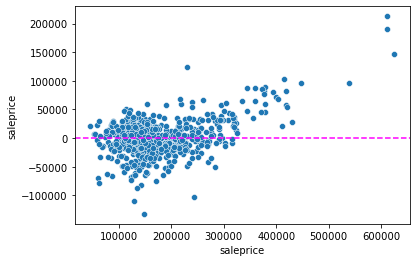

In [107]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

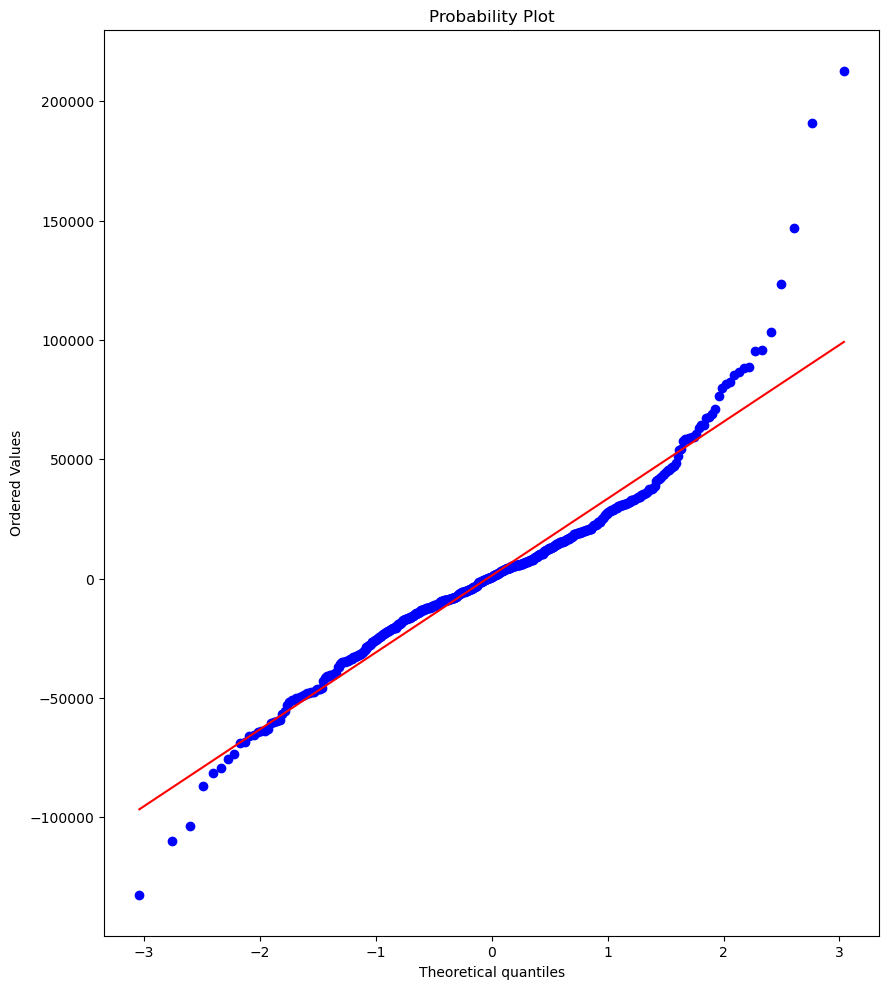

In [108]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_pred,plot=ax)

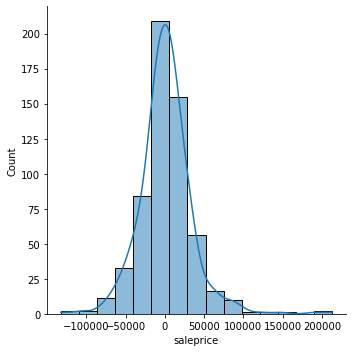

In [109]:
sns.displot(test_pred,bins=15,kde=True)

In [42]:
#dump(scaler,"cs1_Ames_Housing_scaler.pkl")

['cs1_Ames_Housing_scaler.pkl']

In [43]:
#dump(lasso_model,"cs1_Ames_Housing_model.h5")

['cs1_Ames_Housing_model.h5']